<a href="https://colab.research.google.com/github/jcardonamde/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Food Sales Predictions**

# **Parte 1**

Importar libreria y dataset

In [139]:
import pandas as pd

In [140]:
file_food_sales = '/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Proyecto/sales_predictions.csv'
df = pd.read_csv(file_food_sales)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




---



# **Parte 2**

El primer proyecto será de una predicción de ventas para productos alimenticios vendidos en diversas tiendas.  El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

Para la parte 2, la tarea es usar Pandas para empezar a limpiar y explorar los datos. Al ser científicos de datos, alrededor del 80% de nuestro tiempo se dedica a la preparación de datos, así que este es un paso muy importante. 



*   Sus datos ya deberían estar cargados en el cuaderno de la parte 1 del proyecto.
*   Exploren los datos - ¿Qué necesitan para limpiar estos datos? ¡Límpienlos!
*   Asegúrense de abordar cada una de las siguientes tareas:



  


**1)** ¿Cuántas filas y columnas?

In [141]:
df.shape

(8523, 12)

Tenemos en nuestro dataset 8523 filas y 12 columnas.

**2)** ¿Cuáles son los tipos de datos en cada variable?

In [142]:
# Mediante la función de info obtenemos el tipo de dato en cada columna del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3)** ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [143]:
# Identificamos cual es la cantidad de datos duplicados
df.duplicated()
df.duplicated().sum()

0

Al momento no se tienen datos duplicados en el dataset



---



**4)** Identifiquen los valores faltantes.

Revisando la información que me trajo el anterior paso 2. Pude identificar que las columnas de Item_Weight y Outlet_Size estan por debajo del valor de datos homogeneo que encontramos en el resto de columnas, que en este caso seria de 8523 valores.

In [144]:
# Inicialmente examino el número de valores unicos entre las columnas con las cuales estamos trabajando
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Con la anterior función puedo identificar que Item_Weight tiene 415 datos unicos y Outlet_Size 3 datos unicos.

In [145]:
# Luego verificamos cuanto es el número de filas sin información en estas columnas
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Nos encontramos que tenemos 1463 datos faltantes en la columna Item_Weight y tenemos 2410 datos faltantes en la columna Outlet_Size



---



**5)** Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [146]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [147]:
# Realizo un filtrado por los valores faltantes de la columna Item_Weight para validar en el dataframe como se ven las columnas 
item_weight_missing = df['Item_Weight'].isna()
df.loc[item_weight_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Me llamo la atención que habia cierta relación de los datos faltantes con las columnas Outlet_Identifier, Outlet_Establishment_Year y Item_Fat_Content. Procedo a hacer una analisis de agrupar por cada columna junto con la sumatoria de los valores para identificar patrones.

In [148]:
# Hago un agrupamiento y sumatoria por la columna de Outlet_Identifier para analizar 
df.groupby(['Outlet_Identifier']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,7166.800,56.308832,78131.5646,1108890,1.883402e+05
OUT013,12121.730,55.879859,131809.0156,1851884,2.142664e+06
OUT017,11877.495,56.834646,129103.9564,1858482,2.167465e+06
OUT018,11946.465,56.621454,131477.7724,1864352,1.851823e+06
OUT019,0.000,57.257041,73807.5824,1048080,1.796941e+05
OUT027,0.000,54.804764,130714.6746,1855975,3.453926e+06
OUT035,11931.295,56.974873,133103.9070,1863720,2.268123e+06
OUT045,11751.840,56.180780,130942.7782,1859858,2.036725e+06
OUT046,11966.125,56.231875,132113.3698,1857210,2.118395e+06


Me encuentro de que no hay valores de Item_Weight para dos de los grupos de la Columna Outlet_Identifier. Asi que sigo analizando la siguiente columna.

In [149]:
# Hago un agrupamiento y sumatoria por la columna de Outlet_Establishment_Yearr para analizar 
df.groupby(['Outlet_Establishment_Year']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


En este caso los valores para uno de los grupos de la Columna Outlet_Establishment_Year con Item_Weight no existen. Asi que sigo analizando la siguiente columna.

In [150]:
df.groupby(['Item_Fat_Content']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,3328.835,21.054330,43857.1062,631348,6.552424e+05
Low Fat,54687.900,326.541080,717390.8394,10167044,1.101503e+07
Regular,30341.545,200.970026,409413.1214,5771667,6.457454e+06
low fat,1055.375,7.313655,15071.7328,223539,2.338270e+05
reg,1361.320,7.764190,15948.6810,233923,2.295765e+05


En este caso me encuentro que agrupando la columna Item_Fat_Content me trae valores para la relación con la columna Item_Weight. Desde allí podria intuir que sacando una media de estos podria asignarle a la columna que tiene los valores faltantes, dichos valores con el promedio que se pueda obtener.

In [151]:
# Usamos la opción de la media para el relleno de la columna Item_Weight en vista de que el datatype de dicha columna es de tipo Float
median_Item_Weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(median_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Como vemos ya solo tenemos la columna Outlet_Size aun con valores faltantes, y la de Item_Weight rellenada sus anteriores campos vacios con los nuevos datos de la media

In [152]:
# Realizo un filtrado por los valores faltantes de la columna Outlet_Size para validar en el dataframe como se ven las columnas 
Outlet_Size_missing = df['Outlet_Size'].isna()
df.loc[Outlet_Size_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Deseo validar si hay alguna relación de datos faltantes con cada una de estas columnas Outlet_Establishment_Year, Outlet_Size	Outlet_Location_Type, Outlet_Type para el caso de la columna Outlet_Size. 

In [153]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
df.groupby(['Outlet_Type']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Type,,,,,
Grocery Store,13955.636657,113.565873,151939.1470,2156970,3.680343e+05
Supermarket Type1,71661.710000,338.651189,787549.8868,11150224,1.291734e+07
Supermarket Type2,11946.465000,56.621454,131477.7724,1864352,1.851823e+06
Supermarket Type3,12021.898247,54.804764,130714.6746,1855975,3.453926e+06


In [154]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [155]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [156]:
most_common_Outlet_Size = df['Outlet_Size'].mode()
most_common_Outlet_Size

0    Medium
dtype: object

Como no he visto algún patron de relación notable y he definido que esta columna no vaya a influir en primaria instancia en posteriores analisis. Por lo que se creara una nueva 

In [157]:
# Se llenan los datos faltantes con una nueva categoria
df['Outlet_Size'].fillna('Missing', inplace=True)



---



**6)** Confirmen que no hay valores faltantes después de abordarlos.

In [158]:
# Verifico nuevamente con la función isna si tenemos datos faltantes luego de intervenir el dataset inicial
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64



---



**7)** Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [159]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [160]:
# Haciendo una revisión columna por columna nos encontramos que la columna Item_Fat_Content tiene algunos errores en sus valores categoricos
# Se procede a realizar el respectivo correctivo para relacionar los valores errores hacia las categorias Low Fat y Regular
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [161]:
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [162]:
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [163]:
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [164]:
# En este caso encontramos un caso especial es que vemos que hay unos 526 items sin visibilidad, podria ser un dato correcto como quizas un posible error
# Por ahora lo dejaremos en observación, pero ya lo tenemos identificado
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



---



**8)** Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [165]:
# Mostramos con la función describe todas las estadísticas de las columnas numericas
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




---



# **Parte 3**

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

* Histograma para ver las distribuciones de diversas características en el conjunto de datos.
* Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
* Mapa de calor de la correlación entre las características.

<br>

No duden en agregar más del mínimo. ¡Recuerden que esta es su oportunidad para mostrar sus habilidades!

## * **Gráficos tipo Historigrama**

In [166]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

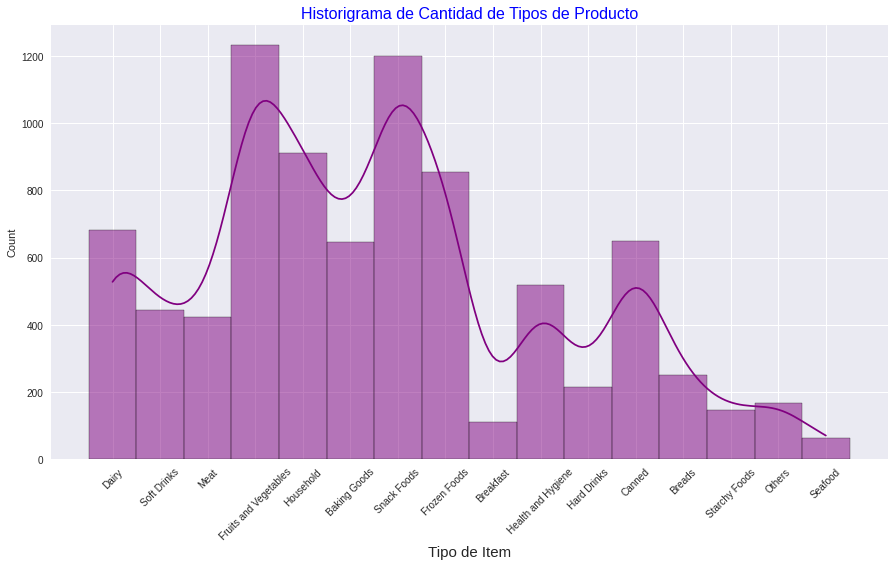

In [167]:
# Se crea historigrama de la columna Item_Type
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = df['Item_Type'], bins = 30, edgecolor='black', kde = True, color='purple')
plt.title('Historigrama de Cantidad de Tipos de Producto', fontsize=16, color='b')
plt.xlabel("Tipo de Item", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

Con el gráfico anterior podemos visualizar que el tipo de Ítem que registra una mayor cantidad de productos asociados a la categoría que los representa. Es Fruits and Vegetables, seguido por Snack Foods y Household, estos seran los que consideraremos como los más destacados.

<br>

Lo anterior nos puede dar una guía, para preguntarnos de sí este grupo de Ítems son los de mayor interés para el consumidor, o por el contrario haya una saturación que nos lleve a determinar si tenemos que reducir la cantidad de ítems a alguna de estas categorías y focalizar el esfuerzo en otra categoría que represente mayor ingreso por ventas.

---

In [168]:
# Generamos un filtro para obtener un acercamiento mas claro de cuantos solos Items o Productos que han tenido ventas superiores a 2000 USD
high_average_sales_filter = df.loc[:, 'Item_Outlet_Sales'] > 2000
high_average_sales_filter.value_counts()

False    4667
True     3856
Name: Item_Outlet_Sales, dtype: int64

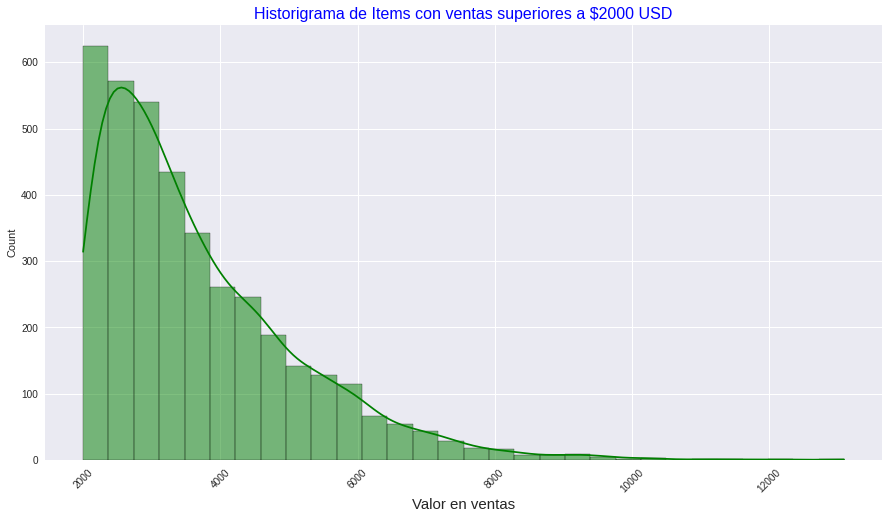

In [169]:
# Creando historigrama del filtro realizado previamente a la Columna de Ventas por valor superior a 2000 USD
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot( data = df.loc[high_average_sales_filter, 'Item_Outlet_Sales'], bins = 30, edgecolor='black', kde = True, color='g')
plt.title('Historigrama de Items con ventas superiores a $2000 USD', fontsize=16, color='b')
plt.xlabel("Valor en ventas", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

Podemos visualizar que tenemos un punto de partida con más de 600 productos que tienen ventas mayores a 2000 USD, también notamos que valor en ventas de Ítems se va reduciendo gradualmente cuando el número de ítems relacionado con dichas ventas se reduce hasta casi llegar a cero cuando supera el valor de ventas por 10000 USD.

<br>

Lo anterior nos permite también tener una idea de que tanta fuerza de venta tiene el stock de la amplia gama de productos que se ofertan a los clientes y en cuáles se podrían focalizar las campañas en tiendas para ir creciendo en ventas. Que la tendencia sea más consistente y no en caída a partir de este valor de ítem con más de 2000 USD en ventas.



---

## * **Gráficos tipo BoxPlot**

In [170]:
# Hacemos un conteo de los valores asociados a la columna Outlet_Type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [171]:
# Hacemos un conteo de los valores asociados a la columna Outlet_Location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

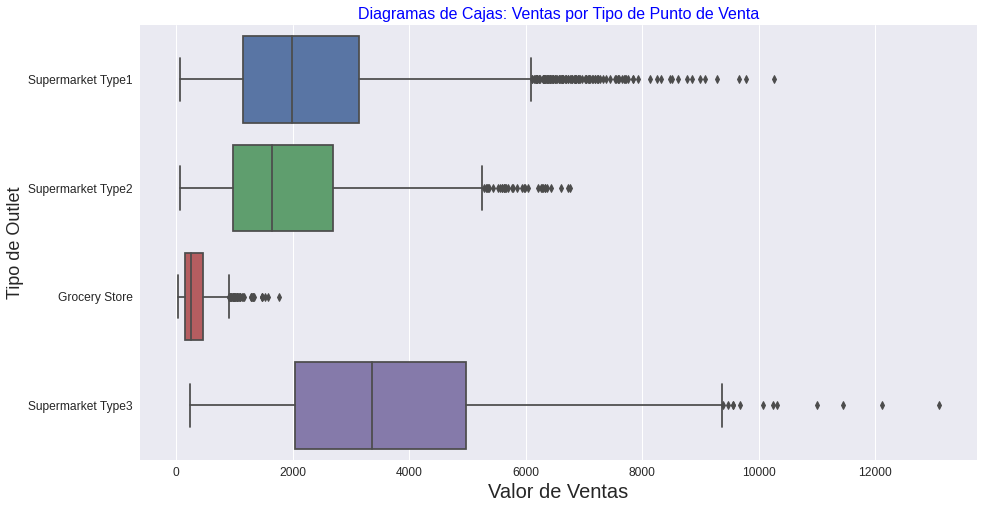

In [172]:
# Creando boxplots que nos enseñe el valor de ventas por tipo de Outlet
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Outlet_Type'])
plt.title('Diagramas de Cajas: Ventas por Tipo de Punto de Venta', fontsize=16, color='b')
plt.xlabel('Valor de Ventas', fontsize = 20);
plt.xticks(fontsize = 12);
plt.ylabel('Tipo de Outlet', fontsize = 18);
plt.yticks(fontsize = 12);
plt.show()

La gráfica nos permite evidenciar que hay mayor variabilidad en el Supermarket Type3. Donde los puntos de Venta relacionados a este tipo de Outlet tiene por ejemplo un máximo de ventas de hasta 9000 USD por tienda y algunos valores atipicos que exceden ese rango.

Visualizamos un caso especial y que los puntos de venta de tipo Grocery Store por ejemplo su máximo no excede el valor de ventas promedio del Supermarket con menor ventas. Seria un punto analizar en caso de querer impulsar la fuerza de venta de este tipo de ventas y que tanta proyección tenga en retorno inversión a futuro.

Las gráficas nos enseñan que los Outlet de tipo Supermarket 1, 2 y 3 son los que tienen mejor impacto en sus ventas tendiendo a exceder los 5000 USD en ventas.



---

## * **Mapa de calor de la correlación entre las características**


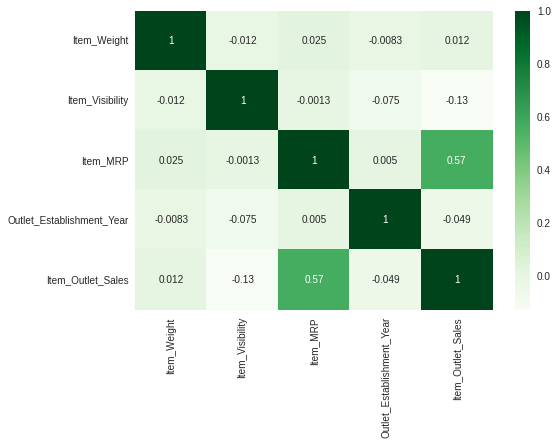

In [173]:
# Se genera gráfico de tipo correlacional
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

Observando la gráfica, aparte de la correlación donde las columnas se comparan consigo mismas,   solo se rescata una correlación y es entre la columna Item_MRP con la columna Item_Outlet_Sales con estado moderado de 0.57. 

Podría ser útil y lo analizaremos en posteriores análisis para identificar una mejor toma de decisiones con estos datos.



---



# **Parte 4**



Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.

• Aprovechen sus limpiezas, exploraciones y análisis anteriores.

• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

In [174]:
# Analizamos nuevamente la descripción de columnas asociadas a valores númericos
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Teniendo en cuenta que de estas columnas las que guardan una mejor correlación son Item_MRP con Item_Outlet_Sales. Analizaremos como se comportan los 20 productos con más ventas respecto a su costo de planificación de los insumos (MRP).

In [175]:
# Genero un filtro de la columna 'Item Outlet Sales' de todos los valores que estan por encima del promedio
# Posteriormente asocio a una variable el dataframe donde en filas va tener los valores de busqueda del filtro inicial agrupado por 'Item MRP' e 'Item Outlet Sales'
# Estos valores los ordenamos de mayor a menor desde el valor máximo del filtrado y mostrando los primeros 20 Item con mas ventas en Outlets en comparación a su MRP

Item_Outlet_Sales_Filter = df['Item_Outlet_Sales'] > 2181
top20IOS = df.loc[Item_Outlet_Sales_Filter, :].groupby(['Item_MRP'])['Item_Outlet_Sales'].max().sort_values(ascending = False).head(20)
top20IOS

Item_MRP
234.9958    13086.9648
242.6512    12117.5600
253.0356    11445.1020
254.2672    10993.6896
228.0352    10306.5840
261.2910    10256.6490
248.3750    10236.6750
245.2802    10072.8882
262.5226     9779.9362
208.9928     9678.0688
255.5356     9664.7528
222.3772     9562.2196
190.6846     9554.2300
263.9910     9467.6760
228.1352     9390.4432
260.6278     9371.8008
259.2646     9275.9256
230.9984     9267.9360
255.7988     9251.9568
255.4330     9227.9880
Name: Item_Outlet_Sales, dtype: float64

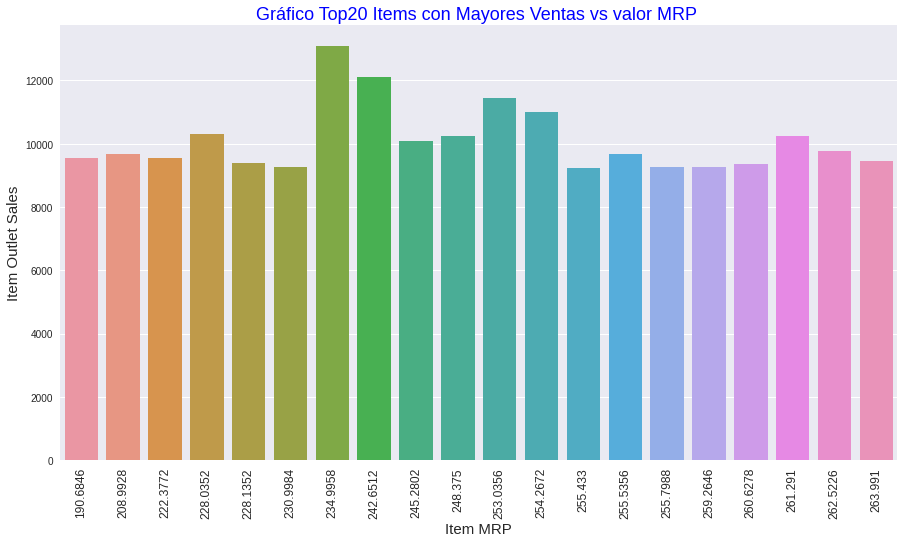

In [176]:
# Generamos un gráfico de barras para hacer seguimiento visual a los datos trabajados en este primer análisis
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = top20IOS.index, y = top20IOS.values);
plt.title('Gráfico Top20 Items con Mayores Ventas vs valor MRP ', size = 18, c = 'b')
plt.xticks(rotation = 90, size = 12);
plt.xlabel("Item MRP", size = 15)
plt.ylabel("Item Outlet Sales", size = 15)
plt.show()

## **Conclusión Gráfico 1:**

Como vemos en el gráfico, los Ítems que se ven representados por mayor número de ventas en Outlet no necesariamente son los que implican una mayor planificación de requerimientos de material (MRP).

En caso del Ítem, que tiene ventas de Outlet por más de, 13086 USD, tiene un MRP de 234.9 lo que nos lleva a pensar que este producto es rentable frente a sus pares más cercanos. Por lo que podría impulsarse más su masificación en los tipos de tiendas donde se oferta, mejorar su visibilidad o crear campañas con enfoque de su público nicho.






---



In [177]:
number_of_outlets = df['Outlet_Establishment_Year'].value_counts().sort_values(ascending = False)
number_of_outlets

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [178]:
number_of_outlets_Years = [1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]
number_of_outlets_Years

[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

In [179]:
number_of_outlets_Values = [1463, 932, 930, 555, 930, 929, 930, 926, 928]
number_of_outlets_Values

[1463, 932, 930, 555, 930, 929, 930, 926, 928]

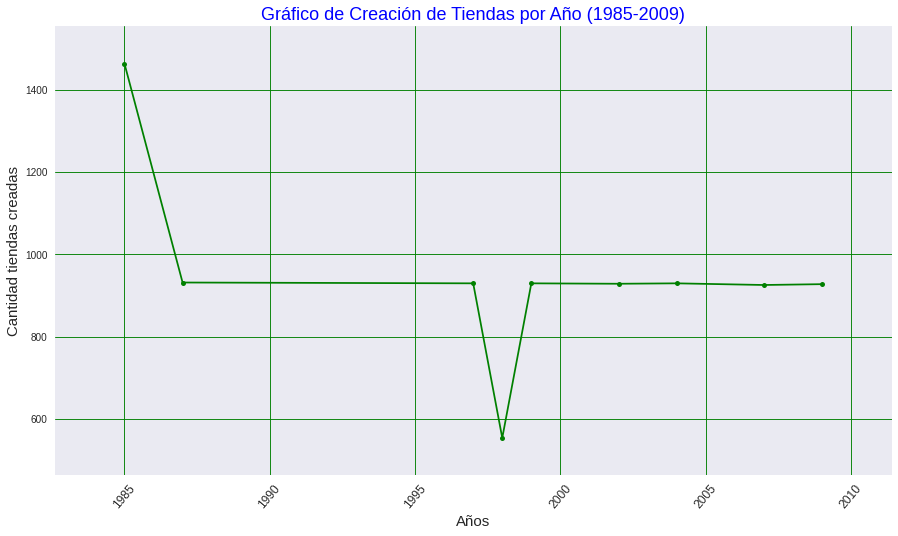

In [180]:
# Se crea grafico de tipo Plot para visualizar el comparativo de Gasto Militar de dicho Pais por Año entre 2000 y 2021
fig, ax = plt.subplots(figsize = (15, 8))
plt.style.use('seaborn')
plt.plot(number_of_outlets_Years, number_of_outlets_Values, c = 'green', marker = '.', markersize = 10)
plt.xlabel("Años", size = 15)
plt.xticks(rotation = 50, size = 12)
plt.ylabel("Cantidad tiendas creadas", size = 15)
plt.title('Gráfico de Creación de Tiendas por Año (1985-2009)', size = 18, c = 'b')
plt.ticklabel_format(useOffset = False, style = 'plain')
plt.grid(c = 'g', 
         alpha = .9,
         linestyle = '-')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.1)

## **Conclusión Gráfico 2:**

El gráfico nos comunica que el minorista tuvo un impulso fuerte en su posicionamiento al inicial con 1463 tiendas para el año de inicio de operaciones (Al menos el que se registra en el data set), el cual se da a partir de 1985.

A partir de este año, el minorista redujo su número de tiendas por año de manera considerable, de pasar de 1463 tiendas a 932 tiendas en 1987. Ósea tan solo dos años después de haber iniciado operaciones.

Desde ese punto se mantuvo entre un promedio de 926 a 930 tiendas en apertura hasta mediados de 2009. Aunque cabe destacar que en 1998 tuvo otra reducción importante de tiendas hasta llegar a las 555 tiendas, punto desde el que se retomó nuevamente la fuerza hasta mantenerse en el rango anteriormente mencionado y relacionado con el 2009.

Este último análisis nos lleva a intuir que el minorista tuvo un año de ventas no tan beneficioso que lo llevo al cierre de tantas tiendas o que quizás el modelo de negocio se encontraba en algún proceso de restructuración. 



---



# **Parte 5**

.

In [181]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
